<a href="https://colab.research.google.com/github/HAN-GEONHUI/test/blob/t_academy_%EC%88%98%EC%97%85_pandas/titanic_eda(240904).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#데이터 핸들링
import pandas as pd
import numpy as np

#간단한 시각화
import matplotlib.pyplot as plt
import seaborn as sns
#->추가적으로 더 필요한것들: re,datetime,etc

In [ ]:
#Q)주어진 파일 불러오기
#-->회사에서 db에 붙어서 pk-->가로 인덱스
#-->기존 컬럼을 가로 인덱스
# passenger ID
path ='/content/titanic_train.csv'
data = pd.read_csv(path, sep=",", index_col="PassengerId")
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
data.tail(2)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
#잠시 내가 만든 인덱스가 위의 경우처럼 정수라면
# or 그냥 태생적인 정수 인덱스도 있다면

In [ ]:
data.loc[1,:]
# --> 내가 만든 passengerID의 index값 = 1인 데이터

,1
Survived,0
Pclass,3
Name,"Braund, Mr. Owen Harris"
Sex,male
Age,22.0
SibSp,1
Parch,0
Ticket,A/5 21171
Fare,7.25
Cabin,NaN


In [ ]:
data.iloc[1,:] # --> 태생적인 정수인덱스1번
#              ==> 이 상황에서는 실제 2번째 데이터

,2
Survived,1
Pclass,1
Name,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
Sex,female
Age,38.0
SibSp,1
Parch,0
Ticket,PC 17599
Fare,71.2833
Cabin,C85


In [ ]:
# Q) 간단하게 df의 정보를 확인해봐야한다
#    전체 숫자, 자료형, 누락데이터 등-> 만약 전부 대체값으로 채운다면 09번 캐빈은 600개가 넘는걸 채우는거다.
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 115.8+ KB


In [ ]:
#ML--> 무조건 체크할 요소가 값의 종류가 수치형
#--> 누락된 값은 무조건 없어야 함

In [ ]:
#AGE 컬럼에서 누락된 데이터만 체크를 해보자
#sql: select * from df where Age is null /is not null;
col = "Age"
data[data["Age"].isnull()]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,NaN,S
20,1,3,"Masselmani, Mrs. Fatima",female,NaN,0,0,2649,7.2250,NaN,C
27,0,3,"Emir, Mr. Farred Chehab",male,NaN,0,0,2631,7.2250,NaN,C
29,1,3,"O'Dwyer, Miss. Ellen ""Nellie""",female,NaN,0,0,330959,7.8792,NaN,Q
...,...,...,...,...,...,...,...,...,...,...,...
860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,NaN,C
864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",female,NaN,8,2,CA. 2343,69.5500,NaN,S
869,0,3,"van Melkebeke, Mr. Philemon",male,NaN,0,0,345777,9.5000,NaN,S


In [ ]:
714+177

891

In [ ]:
len(data[data["Age"].isnull()])/len(data)

0.19865319865319866

In [ ]:
#--> 전체 컬럼들을 대상으로 돌려가면서 누락비율을 체크
for col in data.columns:
    print(col,":", len(data[data[col].isnull()]) / len(data))

Survived : 0.0
Pclass : 0.0
Name : 0.0
Sex : 0.0
Age : 0.19865319865319866
SibSp : 0.0
Parch : 0.0
Ticket : 0.0
Fare : 0.0
Cabin : 0.7710437710437711
Embarked : 0.002244668911335578


In [ ]:
#Q) 여러 조건에 의한 필터링
#조건:Embarked-->"C"
#     Fare-->200초과
#--> 이 조건을 만족하는 데이터만 891에서 추려보자

In [ ]:
#data[Embarked] =="c"
#data["Fare"]>200
data[(data["Embarked"]=="C") & (data["Fare"]>200)]

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
378,0,1,"Widener, Mr. Harry Elkins",male,27.0,0,2,113503,211.5000,C82,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
701,1,1,"Astor, Mrs. John Jacob (Madeleine Talmadge Force)",female,18.0,1,0,PC 17757,227.5250,C62 C64,C


In [ ]:
# Q) 여러 조건에 의한 필터링!!!
# 조건 : Embarked --> "C"
#        Fare ------> 200초과
# ==> 보려는 기준 : Fare기준으로 내림차순
data[(data["Embarked"]=="C") & (data["Fare"]>200)].sort_values(by=["Fare"], ascending=False)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C
680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C
738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C
312,1,1,"Ryerson, Miss. Emily Borie",female,18.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
743,1,1,"Ryerson, Miss. Susan Parker ""Suzette""",female,21.0,2,2,PC 17608,262.3750,B57 B59 B63 B66,C
119,0,1,"Baxter, Mr. Quigg Edmond",male,24.0,0,1,PC 17558,247.5208,B58 B60,C
300,1,1,"Baxter, Mrs. James (Helene DeLaudeniere Chaput)",female,50.0,0,1,PC 17558,247.5208,B58 B60,C
381,1,1,"Bidois, Miss. Rosalie",female,42.0,0,0,PC 17757,227.5250,NaN,C
558,0,1,"Robbins, Mr. Victor",male,NaN,0,0,PC 17757,227.5250,NaN,C


In [ ]:
#Q)기존의 값을 원하는 기준의 값으로 변경
#-->ML에서는 특징/Feature 어떻게 할지에 따라서 모델 성능이 좌우 EDA+ 도메인 지식
# 나이: 개별 나이를 나이대로 좀 조정을 해보기 ex)30미만:1
#            30~55미만 : 2
#            50이상 : 3
#        ==> 통념, 그 분야에서 주로 쓰는 기준, 나의 데이터 분포 etc
# ==> sql : ~~ case when ~~~
# ==> pandas : m1) apply + lambda --> if/~else~~
#              m2) 변경룰에 대한 dict --> replace
#              m3) apply + 내가 직접 변경함수
#                         (복잡한처리, 다른 패키지 등 처리가 복잡하면,,)

In [ ]:
# m1) lamdba + if
data["Age"].apply( lambda x: 1 if x < 30 else ( 2 if x<55 else 3))

,Age
PassengerId,
1,1
2,2
3,1
4,2
5,2
...,...
887,1
888,1
889,3


In [ ]:
# m3) 나이값을 조정하는 함수
# 입력 : age값
# 출력 : 나이대로 변경한 1~3값
def age_cat(age):
    if age<30:
        return 1
    elif age<55:
        return 2
    else:
        return 3

In [ ]:
age_cat(33)

2

In [ ]:
data["Age"].apply( lambda x: age_cat(x))

,Age
PassengerId,
1,1
2,2
3,1
4,2
5,2
...,...
887,1
888,1
889,3


In [ ]:
data["Age"].apply( age_cat )

,Age
PassengerId,
1,1
2,2
3,1
4,2
5,2
...,...
887,1
888,1
889,3


In [ ]:
[ age_cat(age) for age in data["Age"]]

[1,
 2,
 1,
 2,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 1,
 2,
 1,
 3,
 1,
 3,
 2,
 3,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 1,
 3,
 3,
 2,
 3,
 3,
 3,
 1,
 2,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 3,
 3,
 3,
 3,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 1,
 3,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 2,
 1,
 3,
 1,
 1,
 1,
 1,
 2,
 1,
 3,
 3,
 3,
 1,
 2,
 2,
 1,
 3,
 1,
 2,
 2,
 1,
 1,
 3,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 3,
 2,
 2,
 2,
 1,
 3,
 1,
 3,
 2,
 2,
 1,
 2,
 1,
 1,
 1,
 1,
 2,
 1,
 1,
 3,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 2,
 2,
 2,
 1,
 3,
 2,
 3,
 2,
 1,
 2,
 3,
 3,
 2,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 3,
 1,
 3,
 1,
 1,
 1,
 3,
 1,
 3,
 2,
 2,
 2,
 3,
 3,
 1,
 1,
 1,
 3,
 3,
 2,
 2,
 2,
 2,
 1,
 1,
 1,
 2,
 3,
 3,
 2,
 3,
 1,
 1,
 3,
 2,
 2,
 1,
 1,
 2,
 1,
 1,
 2,
 1,
 2,
 1,
 2,
 3,
 2,
 1,
 2,
 2,
 2,
 1,
 1,
 2,
 3,
 2,
 1,
 1,
 1,
 1,
 3,
 2,
 1,
 3,
 1,
 1,
 3,
 2,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 2,
 2,
 1,
 1,
 2,
 2,


In [ ]:
# --> 새로운 조정된 나이대에 대한 새로운 컬럼
data["Age_new"]= data["Age"].apply( lambda x: 1 if x < 30 else ( 2 if x<55 else 3))
data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_new
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [ ]:
data["Age_new"].value_counts()

,count
Age_new,
1,384
2,288
3,219


In [ ]:
data["Age_new"].value_counts(normalize=True)

,proportion
Age_new,
1,0.430976
2,0.323232
3,0.245791


In [ ]:
data["Age"].value_counts(normalize=True)

,proportion
Age,
24.00,0.042017
22.00,0.037815
18.00,0.036415
19.00,0.035014
28.00,0.035014
...,...
36.50,0.001401
55.50,0.001401
0.92,0.001401


In [ ]:
# Q) 성별이 남성/ 여성이 각기 몇 명이 있는지 확인
# ==> pandas에서 바로 그래프 그리는 부분..

In [ ]:
# 1) value_counts()
data["Sex"].value_counts()

,count
Sex,
male,577
female,314


In [ ]:
data["Sex"].value_counts()[0] # --> 나중에는 쓰지 말기

<ipython-input-43-d74d78c0b834>:1: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  data["Sex"].value_counts()[0] # --> 나중에는 쓰지 말기


577

In [ ]:
# 2) 필터링 --> T/F--> 1/0 --> sum() 카운팅 sql
(data["Sex"]=="male").sum(), (data["Sex"]=="female").sum()

(577, 314)

<Axes: xlabel='Sex'>

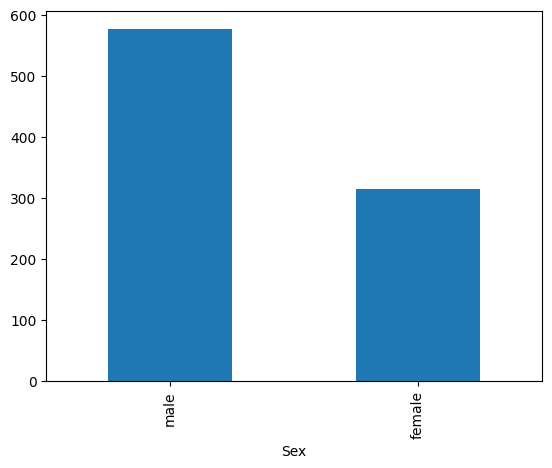

In [ ]:
# ++ pandas 데이터를 핸들링 --> 시각화
data["Sex"].value_counts().plot(kind="bar")

<Axes: title={'center': 'F/M counts'}, xlabel='Sex'>

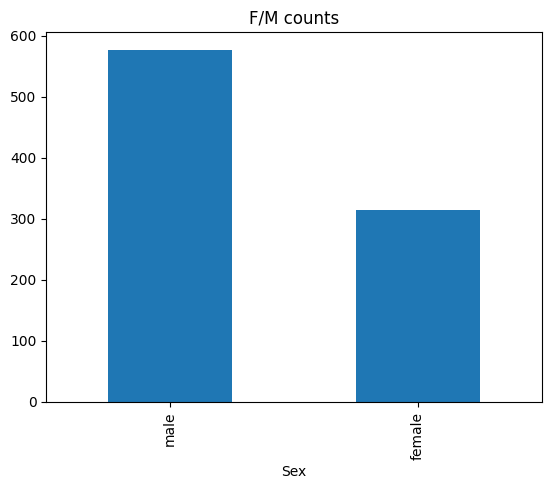

In [ ]:
data["Sex"].value_counts().plot(kind="bar",
                                title="F/M counts")

In [ ]:
data["Sex"].value_counts().index #--> 빈도순으로 정렬

Index(['male', 'female'], dtype='object', name='Sex')

<Axes: title={'center': 'F/M counts'}, xlabel='Sex'>

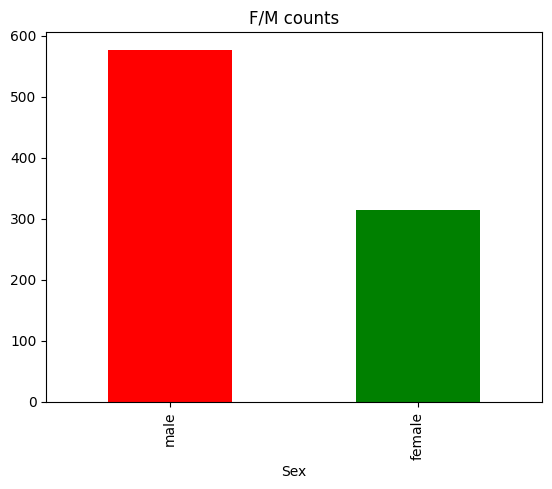

In [ ]:
data["Sex"].value_counts().plot(kind="bar",
                                title="F/M counts",
                                color=["r","g"])

In [ ]:
# ref : https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html
# ==> pandas에서 Series, DF에서 바로 눈에 보이는 결과/테이블을 바로 그래프로 볼 수 있다
# + 그릴판, 영역,기타 이런 것들  필요 없이 눈에보이는 Series, DF을 바로 그래프로 변환
# ==> 간단히 몇 종류에 대해서 실습

In [ ]:
# 각 컬럼끼리의 유니크한 값들 사이의 빈도 테이블
pd.crosstab( data["Pclass"], data["Sex"])
#--> pivot_table,groupby,crosstab 중 편하게 본인스타일로 하기

Sex,female,male
Pclass,,
1,94,122
2,76,108
3,144,347


In [ ]:
pd.pivot_table(data , index=["Pclass"], values=["Sex"],
               aggfunc=["count"])

,count
,Sex
Pclass,
1,216
2,184
3,491


In [ ]:
pd.pivot_table(data , index=["Pclass"],
               columns=["Sex"],
               aggfunc=["count"])

count                                                                 \
          Age      Age_new       Cabin      Embarked        Fare        Name   
Sex    female male  female male female male   female male female male female   
Pclass                                                                         
1          85  101      94  122     81   95       92  122     94  122     94   
2          74   99      76  108     10    6       76  108     76  108     76   
3         102  253     144  347      6    6      144  347    144  347    144   

                                                               
             Parch       SibSp      Survived      Ticket       
Sex    male female male female male   female male female male  
Pclass                                                         
1       122     94  122     94  122       94  122     94  122  
2       108     76  108     76  108       76  108     76  108  
3       347    144  347    144  347      144  347    144  347

In [ ]:
# Seaborn 을 통해서 그래프들을 그려보겠습니다.
# data, 가로x, 세로y, 구별hue etc

<Axes: xlabel='Survived', ylabel='Age'>

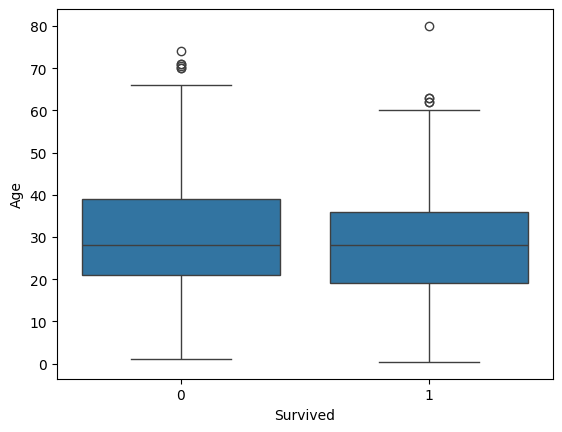

In [ ]:
# cf) 직접 plot 순서쌍을 밀어넣을 수 있음
sns.boxplot(data=data,x="Survived",y="Age")

<Axes: xlabel='Survived', ylabel='Age'>

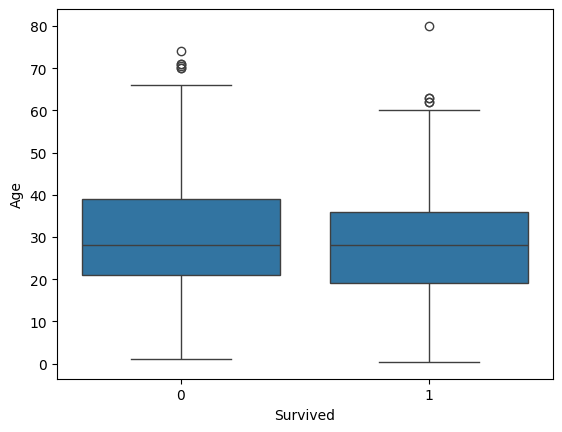

In [ ]:
sns.boxplot(data=data, x="Survived", y="Age")

In [ ]:
# Q) 객실등급 Pclass, 요금Fare --> boxplot

<Axes: ylabel='Fare'>

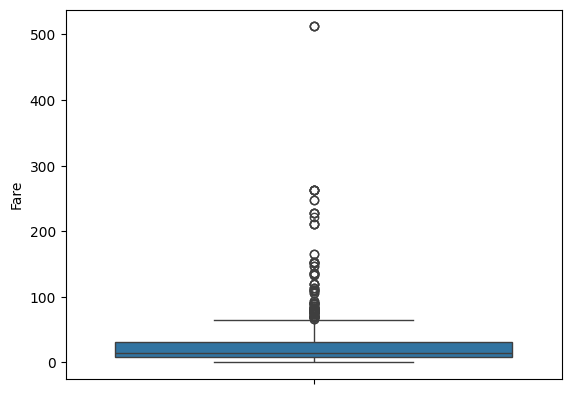

In [ ]:
sns.boxplot(data=data, y="Fare")

<Axes: xlabel='Pclass', ylabel='Fare'>

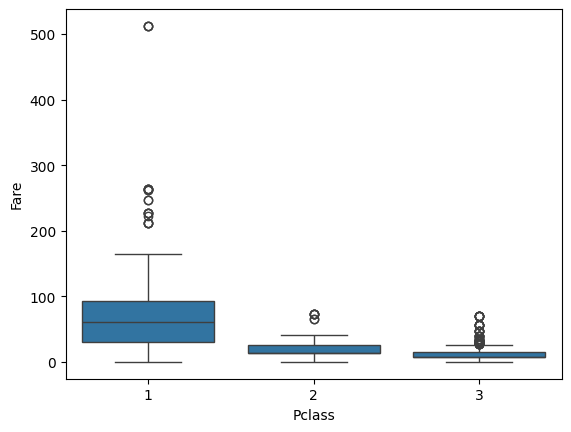

In [ ]:
sns.boxplot(data=data, x="Pclass",y="Fare")

In [ ]:
#목적: 원본 데이터를 봤더니.. 심함 아웃라이더들이 존재!
#--> 아웃라이더들을 제외하고 보고 싶다!
#ex) 상위 5프로는 제외하고 95프로의 데이터만 보자
#     mysql:ntile()
#     pandas:quantile(0.95)
#-->boxplot을 객실별 요금에 대한 그래프를 그려보기(단 상위 5프로 고가 요금은 제외한 데이터에서)

In [ ]:
## 오답 (내가한 방식)
sns.boxplot(data=np.quantile(0.95),x="Pclass",y="Fare")


TypeError: quantile() missing 1 required positional argument: 'q'

<Axes: xlabel='Pclass', ylabel='Fare'>

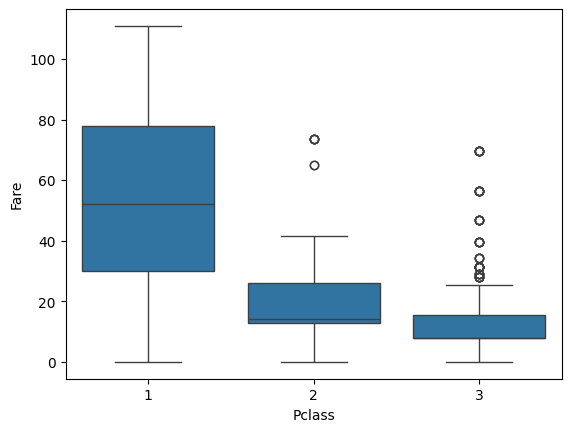

In [ ]:
#정
sns.boxplot(data=data[data["Fare"] < data["Fare"].quantile(0.95)],
            x="Pclass",y="Fare")

<Axes: ylabel='Pclass'>

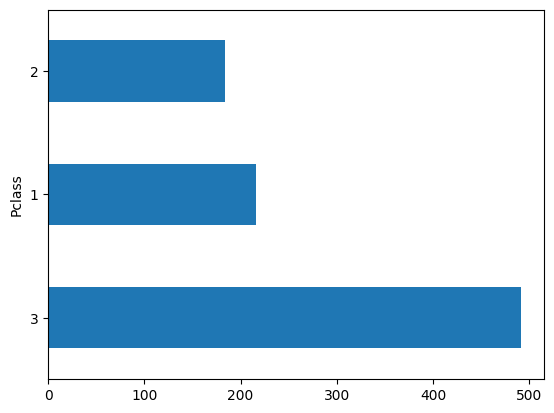

In [ ]:
# Q) 객실 등급별로 승객의 수 그래프로 보자
data["Pclass"].value_counts().plot(kind="barh")

<Axes: xlabel='Pclass', ylabel='count'>

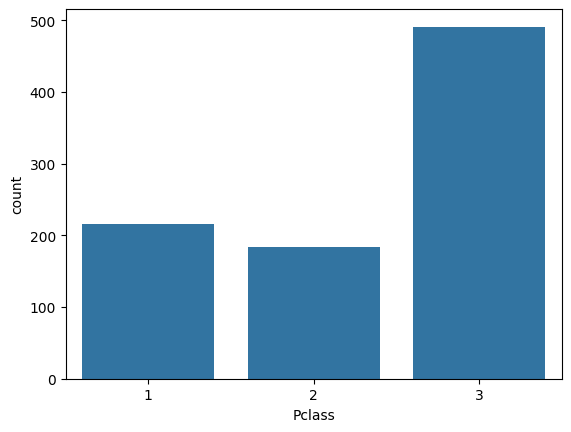

In [ ]:
# seaborn에서는 countplot
sns.countplot( data=data, x="Pclass")

<Axes: xlabel='Pclass', ylabel='count'>

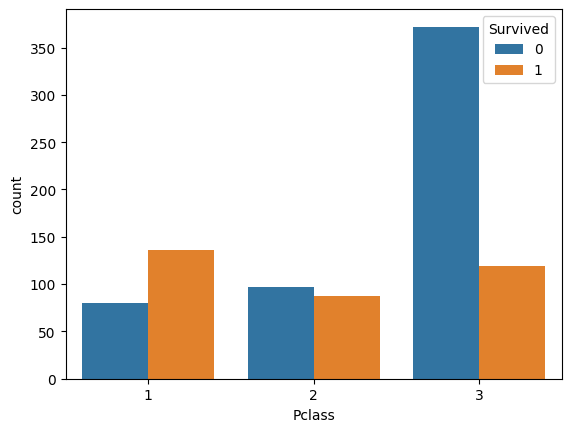

In [ ]:
sns.countplot(data=data,x="Pclass",hue="Survived")

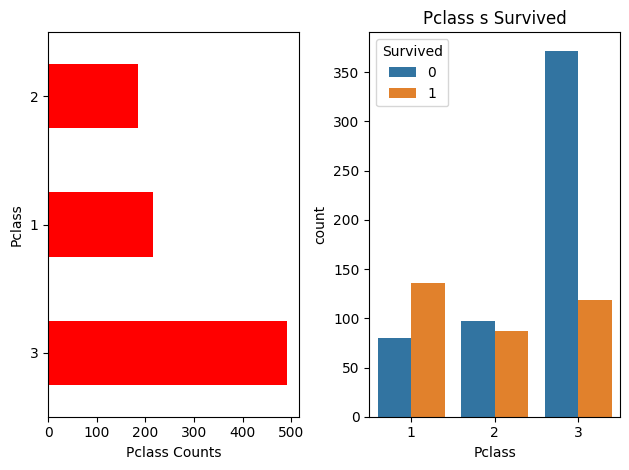

In [ ]:
# Q) 위의 2개의 그래프를 1개의 판에 합쳐서 보자!!!
# ==> 목적 : 1개의 판에 2개의 그래프를 같이 보자..
#     왼쪽 : 객실별 승객수 : pandas plot
#     오른쪽 : 객실별 생존여부에 대한 승객수  : seaborn -> countplot
# ==> 1개 판은 matplotlib

#1) 전체 판
fig, axes = plt.subplots( nrows=1, ncols=2)
# 2) 왼쪽 그래프에 대해서 설정 : pandas --> plot
data["Pclass"].value_counts().plot(kind="barh",
                                   ax=axes[0],
                                   color="r")
axes[0].set_xlabel("Pclass Counts")
# 3) 오른쪽 그래프에 대해서 설정 : seaborn --> countplot
sns.countplot( data=data, x="Pclass", hue="Survived",
              ax=axes[1])
axes[1].set_title("Pclass s Survived")

# 4) 판 전체를 정리
fig.tight_layout()

In [ ]:
# 정리)
# 1. 내가 원하는대로 데이터를 변형/가공할 수 있어야 함!!!
#            ==> pandas의 잡다한 기능을 잘 알면 좋음
#            ==> apply + lambda 함수/ 내가 만든 함수
#            ==> 기존 데이터의 모양을 변경 : pivot_table, groupby, crosstab etc
#                     + concat/merge
#            ==> 내가 원하는 조건에 의한 필터링을 해서 따로 보는 것!!!
#                : 불리언인덱싱, quantile etc
# -----> 눈에 보이는 것을 바로 그래프 : pandas.plot() 시각화
#        단, 모든 것들은 아니고, 정의해둔 그래프 유형만...
#        + matplotlib, seaborn, plotly etc
#        : 이쁘게 꾸며야 하는 포폴이나 발표자료들은 전문BI(테블로, power BI etc)
# cf) 실제 데이터들은 더 지저분하다
#     코드도 전처리에 있어서 더 많이 해야함